In [1]:
#!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

%matplotlib inline

In [2]:
df = pd.read_csv('unclean_data.csv')  

In [3]:
df_backup = df

Removing rows with All Nulls

In [4]:
df.dropna(how='all',inplace=True)

Reseting Index

In [5]:
df = df.reset_index(drop=True)

Removing '£' and comma in price column values

In [6]:
df['price'] = df['price'].apply(lambda x: x.replace('£','')).apply(lambda x: x.replace(',',''))

Renaming the following columns: “fuel type”, “fuel type2”, “engine size”, and “engine size2” into “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively

In [7]:
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [8]:
df.rename(columns={"engine size":"engine_size",
                   "engine size2":"engine_size2",
                   "fuel type":"fuel_type",
                   "fuel type2":"fuel_type2"}, inplace=True)

Filling null values in fuel_type with values in fuel_type

In [9]:
df['fuel_type2'] = df['fuel_type2'].fillna(df['fuel_type'])

Dropping column 'fuel_type'

In [10]:
df.drop(columns=['fuel_type'],inplace=True)

Renaming 'fuel_type2' to 'fuel_type'

In [11]:
df.rename(columns={"fuel_type2":"fuel_type",}, inplace=True)

Filling null values in mileage with values in mileage2

In [12]:
df['mileage'] = df['mileage'].fillna(df['mileage2'])

Removing comma in mileage column values

In [13]:
df['mileage'] = df['mileage'].apply(lambda x: x.replace(',',''))

Making 'mileage' column numeric

In [14]:
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce') 

Dropping column 'mileage2'

In [15]:
df.drop(columns=['mileage2'],inplace=True)

## Removing rows with mileage as null

In [16]:
df= df[df['mileage'].notnull()]

Filling null values in engine_size2 with values in engine_size

In [17]:
df['engine_size2'] = df['engine_size2'].fillna(df['engine_size'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21588\4103250607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_size2'] = df['engine_size2'].fillna(df['engine_size'])


Making 'engine_size2' column numeric

In [18]:
df['engine_size2'] = pd.to_numeric(df['engine_size2'],errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21588\2311419383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_size2'] = pd.to_numeric(df['engine_size2'],errors='coerce')


Converting cc values into litres

In [19]:
df['engine_size2'] = df['engine_size2'].apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21588\2955282759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_size2'] = df['engine_size2'].apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))


Dropping column 'engine_size'

In [20]:
df.drop(columns=['engine_size'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21588\2185731702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['engine_size'],inplace=True)


Renaming 'engine_size2' to 'engine_size'

In [21]:
df.rename(columns = {'engine_size2':'engine_size'}, inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21588\3155629850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'engine_size2':'engine_size'}, inplace = True)


Dropping all rows with any value NaN

In [22]:
# df= df[df['year'].notna()]
df= df.dropna(how='any')

In [23]:
# pd.concat([df1,df2]).drop_duplicates(keep=False)

Changing datatype of 'year' as int64

In [24]:
df['year'] = df['year'].astype('int64')

Dropping 'model' and 'reference' columns

In [25]:
df.drop(columns=['model','reference'],inplace=True)

Making dummies for 'transmission'

In [26]:
transmission = pd.get_dummies(df['transmission'])

In [27]:
df = df.join(transmission)

In [28]:
# df

Making dummies for 'fuel_type2'

In [29]:
fuel_type = pd.get_dummies(df['fuel_type'])

In [30]:
fuel_type.rename(columns={"Other":"Other Fuel Type"}, inplace=True)

In [31]:
df = df.join(fuel_type)

In [32]:
df.drop(columns=['transmission','fuel_type'],inplace=True)

In [33]:
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [34]:
print(f"Number of Rows in Clean Dataset : {len(df.index)}")

Number of Rows in Clean Dataset : 3898


# EDA

In [35]:
df.head(5)

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other Fuel Type,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0


Summary Statistics of the data

In [36]:
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other Fuel Type,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


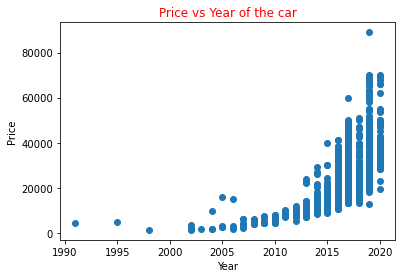

In [37]:
# relationship between year and price
plt.scatter(df['year'], df['price'])
plt.title("Price vs Year of the car",color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Relationship between year and mean price

<AxesSubplot:xlabel='year'>

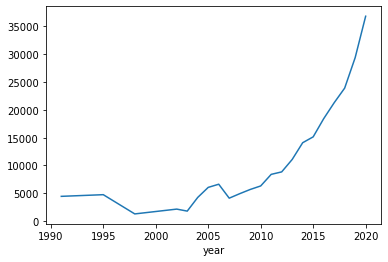

In [38]:
df.groupby('year')['price'].mean().plot()

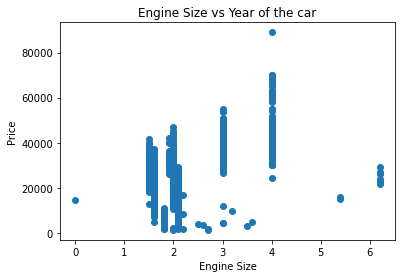

In [39]:
# relationship between engine_size and price
plt.scatter(df['engine_size'], df['price'])
plt.title("Engine Size vs Year of the car")
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

Relationship between engine_size and mean price

<AxesSubplot:xlabel='engine_size'>

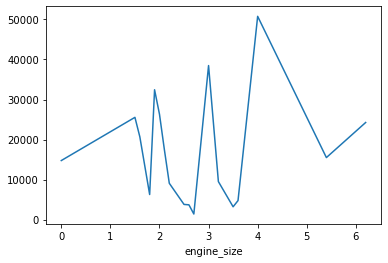

In [40]:
df.groupby('engine_size')['price'].mean().plot()
# df.groupby('engine_size')['price'].mean().plot()

Value Counts by Year

In [41]:
df.year.value_counts(sort=True)

2019    1590
2017     665
2016     545
2018     362
2015     321
2014     136
2020     126
2013      64
2012      26
2011      13
2010      10
2008       8
2007       7
2009       7
2005       4
2002       4
2006       3
2004       3
1991       1
1995       1
2003       1
1998       1
Name: year, dtype: int64

Removing Outliers by Empirical method of Statistics on mileage 

In [42]:
mileage_mean = df['mileage'].mean()
mileage_stdev = df['mileage'].std()
# By empirical rule, anything with zscore more 3 or less than -3, is an outlier
upper_bound_mileage = mileage_mean + 3*mileage_stdev
lower_bound_mileage = mileage_mean - 3*mileage_stdev

In [43]:
df.drop(df[df.mileage>upper_bound_mileage].index, inplace=True)
df.drop(df[df.mileage<lower_bound_mileage].index, inplace=True)

Dropping records with price value outliers, i.e. where price 

In [44]:
df.drop(df.loc[df["price"]<5000].index, inplace=True)
df.drop(df.loc[df["price"]>50000].index, inplace=True)

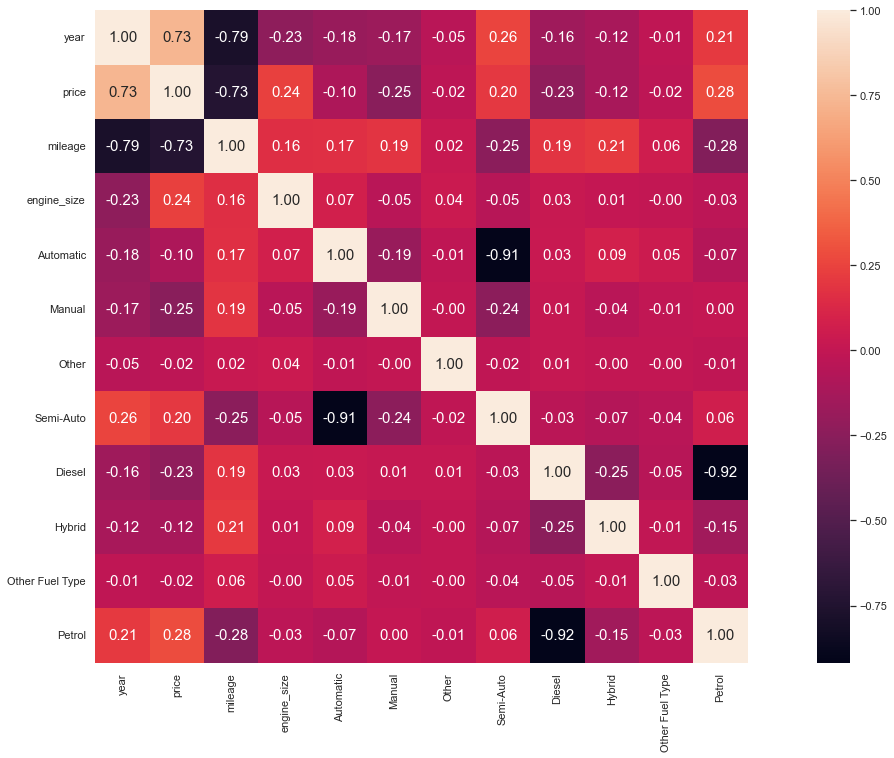

In [45]:
import seaborn as sns
%matplotlib inline

cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(25,12)})
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot = True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={"size":15}, 
                 yticklabels=df.columns,
                 xticklabels=df.columns)

## Split the dataset into training and test sets
We will split 75:25 and using randomstate=42 to make a repeatable result. 


In [46]:
response = df['price']
features = df[['year', 'mileage', 'engine_size', 'Manual', 'Semi-Auto','Diesel','Petrol']]
# features = df.drop('price', axis=1)

In [47]:

X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    response, 
                                                    test_size=0.25,  
                                                    random_state=42)

print("Training and testing split was successful")

Training and testing split was successful


# Training and Testing

In [48]:

# build the model
# Step 1 import the libraries

# Step 2 call the linear regression model
model = LinearRegression()
# Step 3 create the model
model.fit(X_train, Y_train)
print(model)

LinearRegression()


In [49]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

## Evaluate the model performance

In [50]:
# R-squared
print("R^2 in training dataset: ", round(model.score(X_train, Y_train),3))
print("R^2 in testing dataset: ", round(model.score(X_test, Y_test),3))

R^2 in training dataset:  0.776
R^2 in testing dataset:  0.8


In [51]:
# RMSE

# Now finding the mean squared error
mse = mean_squared_error(Y_test, predictions)

print('RMSE in Test set: ',mse**0.5)

RMSE in Test set:  3497.1230796887876


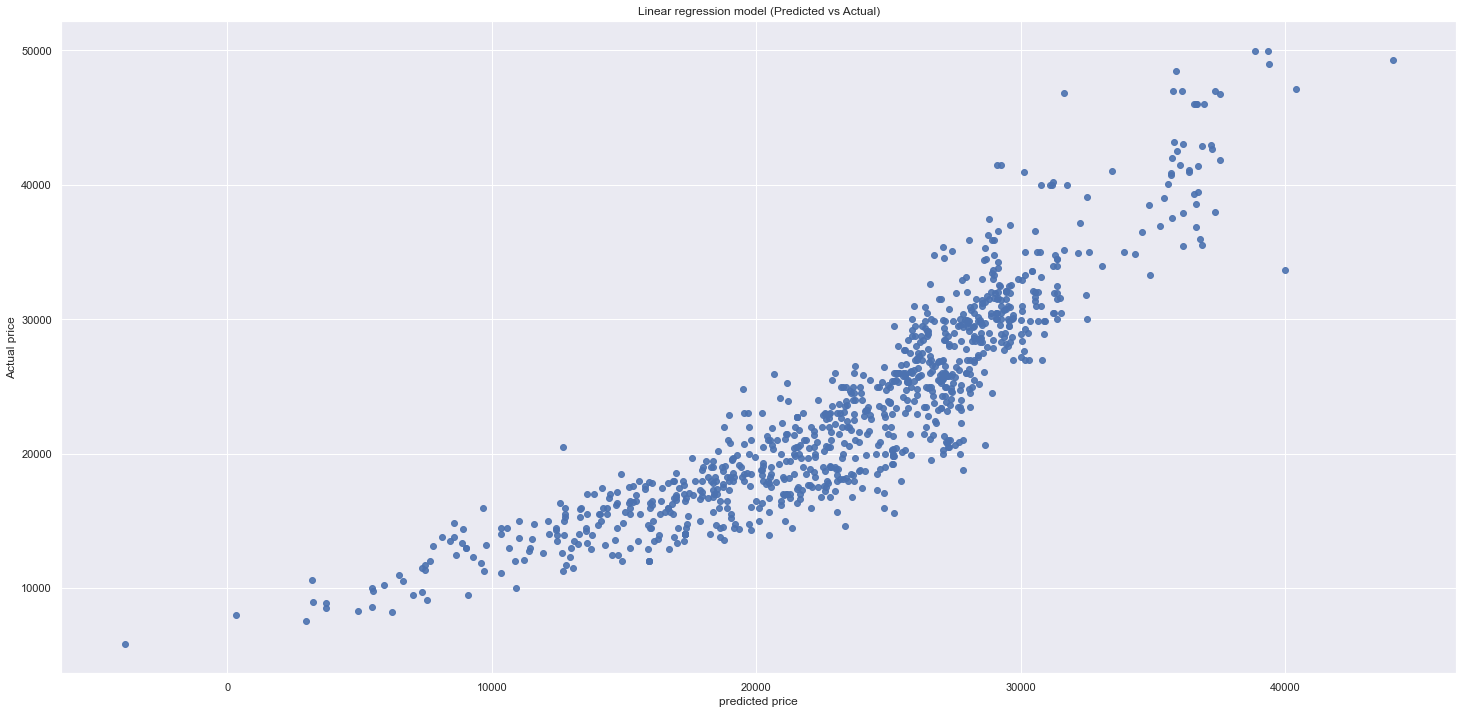

In [52]:
# plot the prediction vs actual
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=0.9, color='b')
plt.xlabel("predicted price")
plt.ylabel("Actual price")
plt.title("Linear regression model (Predicted vs Actual)")
plt.show()

In [53]:
# the coefficient list
feat = list(X_train.columns)
coef = model.coef_.transpose()

coef_table = np.vstack((feat, coef)).T
new_df = pd.DataFrame(coef_table, columns=["Features", "Coeffficients"])
print(new_df)

      Features         Coeffficients
0         year      2099.75105046652
1      mileage  -0.14768999628491145
2  engine_size     6659.426903668011
3       Manual    -3082.186874223108
4    Semi-Auto    -331.9716147598889
5       Diesel     -918.432349090594
6       Petrol     373.0229995798844
